# PCA with Supervised Algorithms

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from matplotlib.pyplot import matplotlib
plt.rcParams["figure.figsize"] = (10,6)

In [2]:
df = pd.read_csv("Wine.csv")

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
df.shape

(178, 14)

In [6]:
df.Customer_Segment.unique()

array([1, 2, 3], dtype=int64)

In [7]:
df.Customer_Segment.value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

<AxesSubplot:>

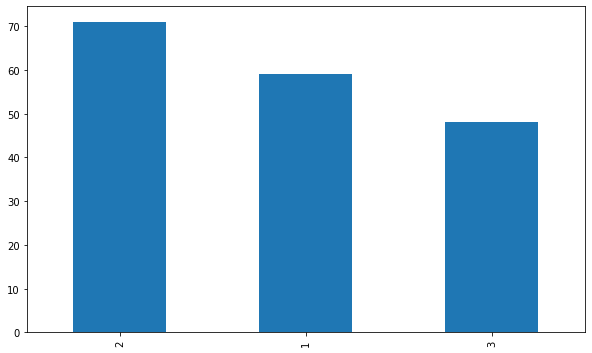

In [8]:
df.Customer_Segment.value_counts().plot.bar()

In [9]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


<AxesSubplot:>

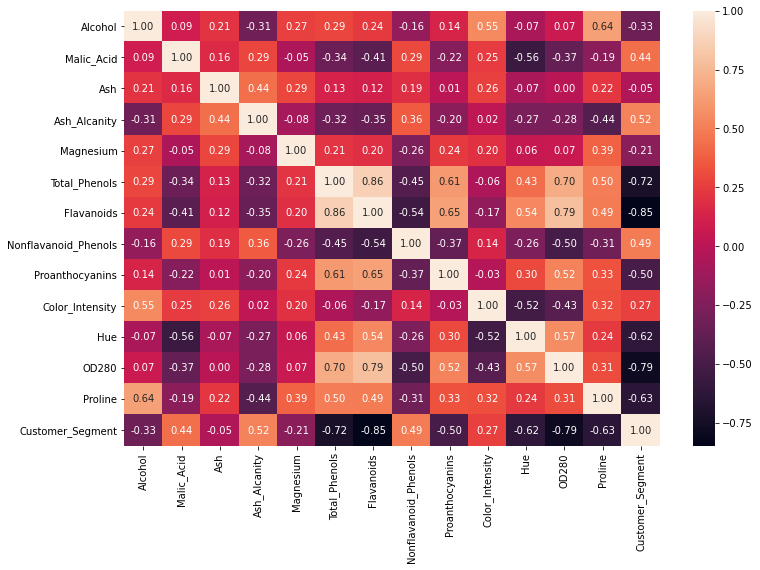

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True, fmt=".2f")

<AxesSubplot:>

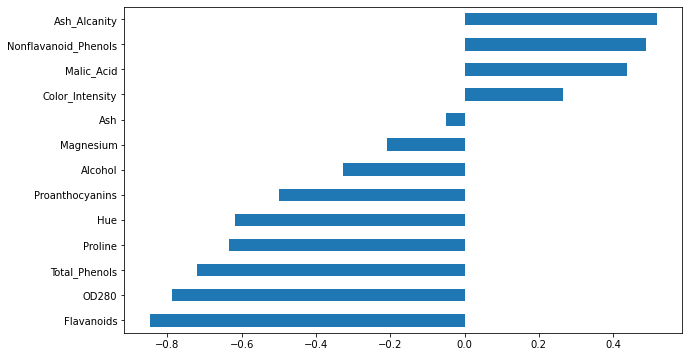

In [11]:
df.corr()["Customer_Segment"][:-1].sort_values().plot(kind="barh")

In [12]:
df.isnull().sum().any()

False

## Split the Data

In [13]:
X = df.drop("Customer_Segment", axis = 1)

In [14]:
y = df["Customer_Segment"]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 101)

## Scaling Data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [19]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modeling with Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
RandomForestClassifier(random_state = 0).fit(X_train, y_train)

<IPython.core.display.Javascript object>

RandomForestClassifier(random_state=0)

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = RandomForestClassifier(random_state = 0).fit(X_train, y_train).predict(X_test)

<IPython.core.display.Javascript object>

In [23]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0]
 [ 0 13  1]
 [ 0  0 10]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      0.93      0.96        14
           3       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



In [24]:
classifier.feature_importances_

array([0.09711485, 0.04207308, 0.01460834, 0.01941397, 0.02705901,
       0.06206973, 0.15588505, 0.01098228, 0.0259216 , 0.15496977,
       0.09291804, 0.11327742, 0.18370686])

In [26]:
feats = pd.DataFrame(index=df.iloc[:,:-1].columns,
                     data= RandomForestClassifier(random_state = 0).
                     fit(X_train, y_train).feature_importances_, 
                     columns=['Importance'])
feats

<IPython.core.display.Javascript object>

,Importance
Alcohol,0.097115
Malic_Acid,0.042073
Ash,0.014608
Ash_Alcanity,0.019414
Magnesium,0.027059
Total_Phenols,0.062070
Flavanoids,0.155885
Nonflavanoid_Phenols,0.010982
Proanthocyanins,0.025922
Color_Intensity,0.154970


In [27]:
imp_feats = feats.sort_values("Importance")
imp_feats

,Importance
Nonflavanoid_Phenols,0.010982
Ash,0.014608
Ash_Alcanity,0.019414
Proanthocyanins,0.025922
Magnesium,0.027059
Malic_Acid,0.042073
Total_Phenols,0.062070
Hue,0.092918
Alcohol,0.097115
OD280,0.113277


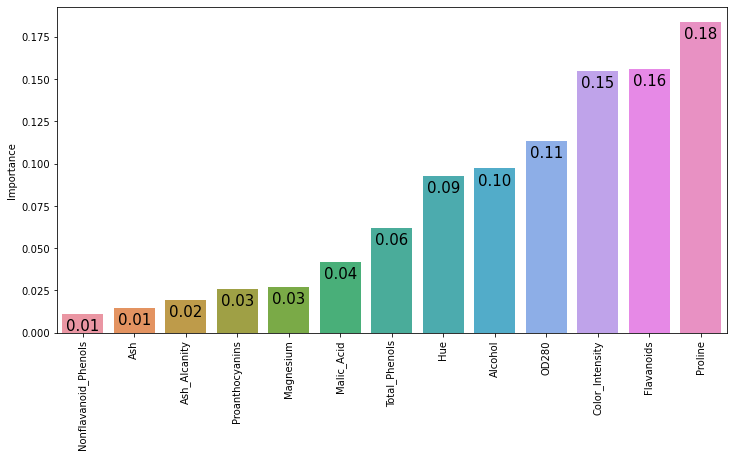

In [28]:
plt.figure(figsize=(12,6))
splot = sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

## Remodelling by feature importance

In [30]:
X2 = df[["Proline", "Color_Intensity", "Flavanoids"]]

In [31]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size = 0.2, stratify=y, random_state =101)

In [35]:
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [37]:
RandomForestClassifier(random_state = 101).fit(X_train2, y_train2)

<IPython.core.display.Javascript object>

RandomForestClassifier(random_state=101)

In [38]:
y_pred2 = RandomForestClassifier(random_state = 101).fit(X_train2, y_train2).predict(X_test2)

<IPython.core.display.Javascript object>

In [39]:
print(confusion_matrix(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))

[[12  0  0]
 [14  0  0]
 [10  0  0]]
              precision    recall  f1-score   support

           1       0.33      1.00      0.50        12
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        10

    accuracy                           0.33        36
   macro avg       0.11      0.33      0.17        36
weighted avg       0.11      0.33      0.17        36



## PCA

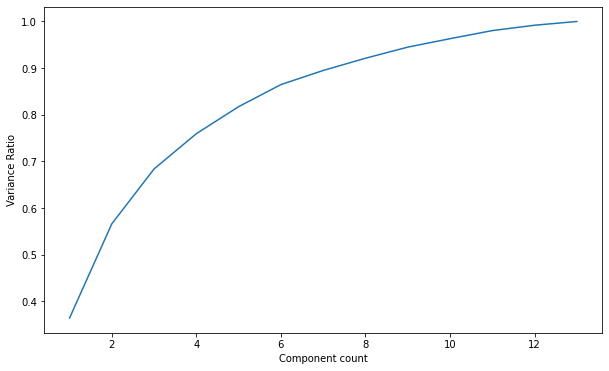

In [40]:
from sklearn.decomposition import PCA
x = range(1,14)
plt.plot(x,np.cumsum(PCA(random_state=101).fit(X_train).explained_variance_ratio_))
plt.xlabel("Component count")
plt.ylabel("Variance Ratio");

In [41]:
PCA(n_components=13, random_state=101).fit(X_train)

PCA(n_components=13, random_state=101)

In [42]:
my_dict = {"explained_variance":PCA(n_components=13,
                                    random_state=101).fit(X_train).explained_variance_, 
           "explained_variance_ratio":PCA(n_components=13,
                                          random_state=101).fit(X_train).explained_variance_ratio_,
           "cumsum_explained_variance_ratio":PCA(n_components=13,
                                                 random_state=101).fit(X_train).explained_variance_ratio_.cumsum()}

In [43]:
df_ev = pd.DataFrame(my_dict, index = range(1,14))
df_ev

,explained_variance,explained_variance_ratio,cumsum_explained_variance_ratio
1,4.771692,0.364468,0.364468
2,2.643484,0.201913,0.566381
3,1.539671,0.117602,0.683983
4,0.989116,0.075550,0.759533
5,0.757802,0.057882,0.817415
6,0.619522,0.047320,0.864735
7,0.395753,0.030228,0.894963
8,0.343370,0.026227,0.921191
9,0.311547,0.023796,0.944987
10,0.236870,0.018092,0.963079


In [46]:
pca = PCA(n_components = 2, random_state=101)

In [49]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [48]:
df_pca_train = pd.DataFrame(X_train_pca)
df_pca_train = df_pca_train.rename(columns={0:"first_component", 1:"second_component"})
df_pca_train.head()

,first_component,second_component
0,1.467419,-0.632722
1,2.380003,-2.286153
2,3.660664,-2.235056
3,4.419513,-1.724002
4,2.146852,0.488849


In [50]:
df_pca_test=pd.DataFrame(X_test_pca)
df_pca_test = df_pca_test.rename(columns={0:"first_component", 1:"second_component"})
df_pca_test.head()

,first_component,second_component
0,0.917258,2.121645
1,3.500861,-0.719312
2,-2.669396,-1.667263
3,-2.602951,-2.193151
4,1.774071,-0.415227


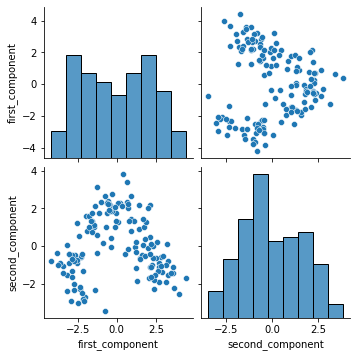

In [51]:
sns.pairplot(df_pca_train)

In [41]:
df_pca_train.corr().round()

,first_component,second_component
first_component,1.0,-0.0
second_component,-0.0,1.0


## Modelling after PCA

In [52]:
RandomForestClassifier(random_state = 101).fit(X_train_pca, y_train)

<IPython.core.display.Javascript object>

RandomForestClassifier(random_state=101)

In [53]:
y_pred = RandomForestClassifier(random_state = 101).fit(X_train_pca, y_train).predict(X_test_pca)
confusion_matrix(y_test, y_pred)

<IPython.core.display.Javascript object>

array([[11,  1,  0],
       [ 1, 12,  1],
       [ 0,  0, 10]], dtype=int64)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.92      0.92      0.92        12
           2       0.92      0.86      0.89        14
           3       0.91      1.00      0.95        10

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



## Interpreting PCA results

In [55]:
scaled_df = pd.DataFrame(X_train, columns = df.columns[:-1])

In [57]:
combined_df = pd.concat([df_pca_train, scaled_df], axis=1)
correlation = combined_df.corr()
correlation.head()

,first_component,second_component,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
first_component,1.000000e+00,3.192487e-16,0.352042,-0.480058,0.070767,-0.459920,0.349401,0.874765,0.925858,-0.656144,0.720271,-0.148389,0.603207,0.822468,0.641101
second_component,3.192487e-16,1.000000e+00,-0.729816,-0.439139,-0.525999,-0.051695,-0.577791,-0.076047,0.051037,-0.032015,-0.034075,-0.833617,0.474571,0.263900,-0.534651
Alcohol,3.520422e-01,-7.298157e-01,1.000000,0.139935,0.162060,-0.303076,0.391377,0.307306,0.219679,-0.226687,0.182820,0.546227,-0.090421,0.083955,0.638666
Malic_Acid,-4.800576e-01,-4.391393e-01,0.139935,1.000000,0.161510,0.241699,-0.011609,-0.332278,-0.389418,0.243462,-0.228755,0.291729,-0.567344,-0.346895,-0.145725
Ash,7.076700e-02,-5.259985e-01,0.162060,0.161510,1.000000,0.455216,0.429118,0.148526,0.133173,0.169240,0.121929,0.269883,-0.066392,0.040839,0.251053


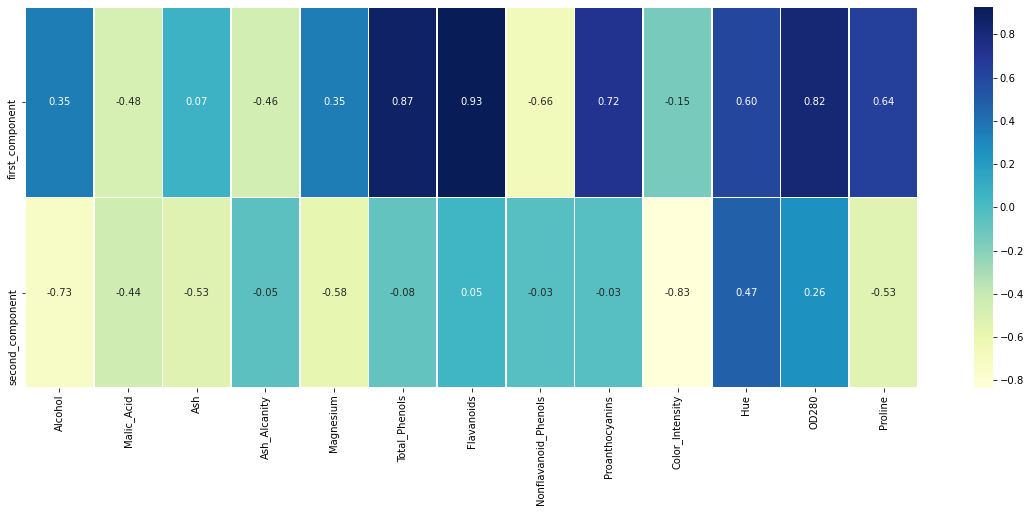

In [59]:
fig, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(correlation.iloc[:2,2:], cmap='YlGnBu', linewidths=.7, annot=True, fmt='.2f')
plt.show()

<AxesSubplot:>

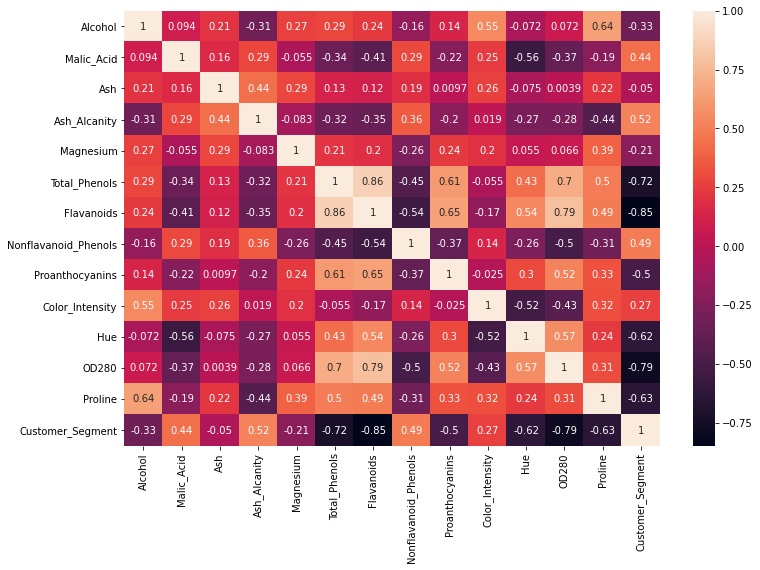

In [60]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:xlabel='first_component', ylabel='second_component'>

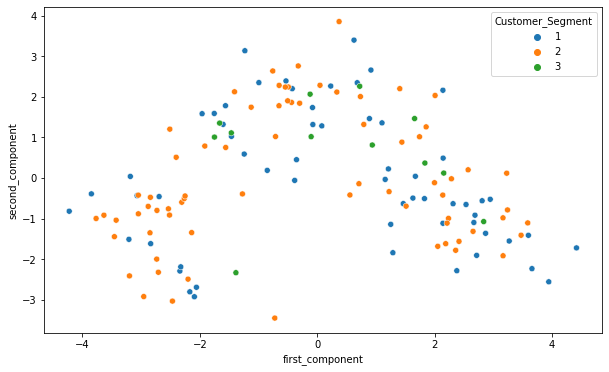

In [61]:
sns.scatterplot(x = df_pca_train["first_component"], y= df_pca_train["second_component"], hue=df.Customer_Segment, 
                palette="tab10")

In [63]:
# import plotly.express as px
# fig = px.scatter_3d(x=df_pca_train["first_component"], y=df_pca_train["second_component"], 
#                     z=df_pca_train["third_component"], color=y_train)
# fig.show()